#Project Description: Rainfall Prediction Classifier

This project involves building a machine learning classifier to predict whether it will rain tomorrow (RainTomorrow) based on historical weather data from the Australian Government’s Bureau of Meteorology. The dataset includes a variety of meteorological features such as temperature, humidity, wind speed and direction, atmospheric pressure, and past rainfall observations collected from 2008 to 2017. The goal is to build a predictive model that can assist in weather forecasting by classifying days as likely or unlikely to receive rainfall.

This end-to-end classification task will take you through the full data science pipeline—from data exploration and feature engineering to model building, hyperparameter tuning using grid search, and evaluation of model performance using relevant metrics and visualizations.

#🎯 Objectives

The primary goal of this project is to build a machine learning classifier capable of predicting the likelihood of rainfall on the following day using historical weather data. This end-to-end classification task involves:

📊 Data Exploration: Understanding the structure, distributions, and patterns within the dataset.

🧼 Data Preprocessing & Feature Engineering: Handling missing values, encoding categorical variables, and scaling features to prepare the data for modeling.

⚙️ Pipeline Construction: Building a modular and reproducible ML pipeline using scikit-learn components.

🔍 Model Selection & Tuning: Training and optimizing different classification models (e.g., Random Forest, SVM, Logistic Regression) using Grid Search with Cross-Validation.

📈 Model Evaluation: Assessing model performance using accuracy, precision, recall, F1-score, and confusion matrices.

🔄 Model Comparison: Experimenting with different classifiers to determine the most effective approach for rainfall prediction.

This project demonstrates practical machine learning skills applied to a real-world weather dataset, aiming to support more informed decision-making in weather forecasting and agriculture.

#🌦️ About the Dataset

The dataset used in this project contains daily weather observations collected from various locations across Australia between 2008 and 2017. It was originally sourced from the Australian Government Bureau of Meteorology and made available on Kaggle through the Rattle package.

The goal is to use this data to predict whether or not it will rain tomorrow (RainTomorrow), based on historical weather measurements.

🔍 Key Features

| Column Name     | Description                                                      | Type   |
|-----------------|------------------------------------------------------------------|--------|
| Date            | Observation date                                                 | object |
| Location        | Weather station location                                         | object |
| MinTemp         | Minimum temperature (°C)                                         | float  |
| MaxTemp         | Maximum temperature (°C)                                         | float  |
| Rainfall        | Rainfall amount (mm)                                             | float  |
| Evaporation     | Amount of evaporation (mm)                                       | float  |
| Sunshine        | Amount of bright sunshine (hours)                                | float  |
| WindGustDir     | Direction of the strongest wind gust                             | object |
| WindGustSpeed   | Speed of the strongest wind gust (km/h)                          | float  |
| WindDir9am      | Wind direction averaged before 9 AM                              | object |
| WindDir3pm      | Wind direction averaged before 3 PM                              | object |
| WindSpeed9am    | Wind speed before 9 AM (km/h)                                    | float  |
| WindSpeed3pm    | Wind speed before 3 PM (km/h)                                    | float  |
| Humidity9am     | Humidity at 9 AM (%)                                             | float  |
| Humidity3pm     | Humidity at 3 PM (%)                                             | float  |
| Pressure9am     | Atmospheric pressure at 9 AM (hPa)                               | float  |
| Pressure3pm     | Atmospheric pressure at 3 PM (hPa)                               | float  |
| Cloud9am        | Fraction of sky covered by cloud at 9 AM (Oktas / eighths)       | float  |
| Cloud3pm        | Fraction of sky covered by cloud at 3 PM (Oktas / eighths)       | float  |
| Temp9am         | Temperature at 9 AM (°C)                                          | float  |
| Temp3pm         | Temperature at 3 PM (°C)                                          | float  |
| RainToday       | Whether it rained today (Yes/No)                                 | object |
| RainTomorrow    | **Target variable**: Will it rain tomorrow? (Yes/No)             | object |


### 📁 Source

- Dataset on Kaggle: [Weather Dataset - Rattle Package](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)
- Column descriptions from: [Australian Bureau of Meteorology](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml)
- Official daily weather data: [Bureau of Meteorology - Climate Data Online](http://www.bom.gov.au/climate/dwo/)




In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [2]:
# ✅ Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Sklearn Utilities for Preprocessing and Modeling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# ✅ Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# ✅ Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ✅ Display Plots Inline
%matplotlib inline

# Optional: Set Seaborn Style
sns.set(style="whitegrid")


In [3]:
#load the data
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()
df.count()

,0
Date,145460
Location,145460
MinTemp,143975
MaxTemp,144199
Rainfall,142199
Evaporation,82670
Sunshine,75625
WindGustDir,135134
WindGustSpeed,135197
WindDir9am,134894


In [4]:
#Drop all rows with missing values
df = df.dropna()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

##Data leakage considerations¶

Consider the descriptions above for the columns in the data set. Are there any practical limitations to being able to predict whether it will rain tomorrow given the available data?

If we adjust our approach and aim to predict today’s rainfall using historical weather data up to and including yesterday, then we can legitimately utilize all of the available features. This shift would be particularly useful for practical applications, such as deciding whether you will bike to work today.

With this new target, we should update the names of the rain columns accordingly to avoid confusion.

In [5]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

##Data Granularity¶






Would the weather patterns have the same predictability in vastly different locations in Australia? I would think not.
The chance of rain in one location can be much higher than in another. Using all of the locations requires a more complex model as it needs to adapt to local weather patterns.
Let's see how many observations we have for each location, and see if we can reduce our attention to a smaller region.

##Location selection

You could do some research to group cities in the Location column by distance, which I've done for you behind the scenes.
I found that Watsonia is only 15 km from Melbourne, and the Melbourne Airport is only 18 km from Melbourne.
Let's group these three locations together and use only their weather data to build our localized prediction model.
Because there might still be some slight variations in the weather patterns we'll keep Location as a categorical variable.

In [6]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

We still have 7557 records, which should be enough to build a reasonably good model.
You could always gather more data if needed by partioning the data into similar locations or simplyby updating it from the source to include a larger time frame.

##Extracting a seasonality feature¶

Now consider the Date column. We expect the weather patterns to be seasonal, having different predictablitiy levels in winter and summer for example.
There may be some variation with Year as well, but we'll leave that out for now. Let's engineer a Season feature from Date and drop Date afterward, since it is most likely less informative than season. An easy way to do this is to define a function that assigns seasons to given months, then use that function to transform the Date column.

In [7]:
#creating a dataset to map seasons
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

###Exercise 1: Map the dates to seasons and drop the Date column¶

In [8]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Apply the function to the 'Date' column
df['Season'] = df['Date'].apply(date_to_season)

# Drop the original 'Date' column
df = df.drop(columns='Date')

# Display the updated DataFrame
df


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


###Exercise 2. Define the feature and target dataframes¶

In [9]:
# Define the feature and target dataframes
X = df.drop(columns='RainToday', axis=1)
y = df['RainToday']


###Exercise 3. How balanced are the classes?
Display the counts of each class.

In [10]:
y.value_counts()

,count
RainToday,
No,5766
Yes,1791


###Exercise 4. What can you conclude from these counts?¶

**How often does it rain annualy in the Melbourne area?**

Out of 7557 days, it rained on 1791 days. This means it rained roughly 23.7% of the time (1791 / 7557 * 100), so about 1 in 4 days experiences rain.

**How accurate would you be if you just assumed it won't rain every day?**

If you simply predicted "No rain" every day, your accuracy would be about 76.3% (5766 out of 7557 days). This is because "No" is the majority class.

**Is this a balanced dataset?**
No, the dataset is imbalanced since the "No" class (no rain) is significantly larger than the "Yes" class (rain). Imbalanced datasets require careful modeling to avoid bias toward the majority class.

###**Next Steps**

Consider using metrics beyond accuracy (like precision, recall, F1-score) to evaluate your model.

Use stratified sampling when splitting the data to keep class proportions consistent.

Experiment with techniques like class weighting, oversampling (SMOTE), or undersampling to handle imbalance.

Build and tune classification models to effectively predict the minority class (rainy days).




###Exercise 5. Split data into training and test sets, ensuring target stratification

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


##Define preprocessing transformers for numerical and categorical features¶

##Exercise 6. Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features

In [12]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


Define separate transformers for both feature types and combine them into a single preprocessing transformer

In [13]:
# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categoricals
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

###Exercise 7. Combine the transformers into a single preprocessing column transformer¶

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


###Exercise 8. Create a pipeline by combining the preprocessing with a Random Forest classifier¶

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


###Define a parameter grid to use in a cross validation grid search model optimizer¶

In [16]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

Pipeline usage in crossvalidation¶

Recall that the pipeline is repeatedly used within the crossvalidation by fitting on each internal training fold and predicting on its corresponding validation fold







Perform grid search cross-validation and fit the best model to the training data
Select a cross-validation method, ensuring target stratification during validation

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

###Exercise 9. Instantiate and fit GridSearchCV to the pipeline¶

In [18]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pressure3pm',
                                                                          'Cloud9am',
                                                                          'Cloud3...
                                                                          'Temp3pm']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [19]:
#Print the best parameters and best crossvalidation score¶
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.85


###Exercise 10. Display your model's estimated score¶

In [20]:
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))


Test set score: 0.84


***So we have a reasonably accurate classifer, which is expected to correctly predict about 84% of the time whether it will rain today in the Melbourne area.***

###Exercise 11. Get the model predictions from the grid search estimator on the unseen data¶

In [21]:
y_pred = grid_search.predict(X_test)


###Exercise 12. Print the classification report¶

In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.76      0.50      0.60       358

    accuracy                           0.84      1512
   macro avg       0.81      0.72      0.75      1512
weighted avg       0.83      0.84      0.83      1512



###Exercise 13. Plot the confusion matrix

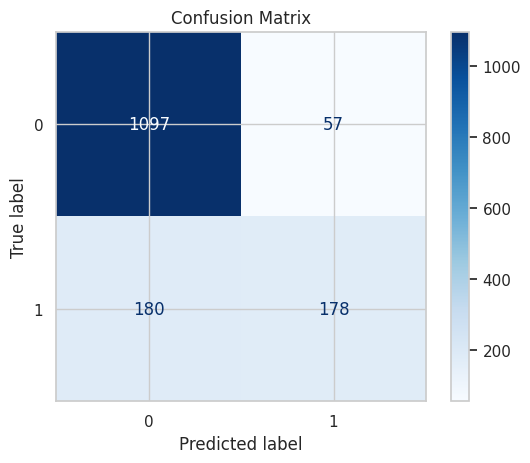

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


###Feature importances¶

Recall that to obtain the categorical feature importances, we have to work our way backward through the modelling pipeline to associate the feature importances with their original input variables, not the one-hot encoded ones. We don't need to do this for the numeric variables because we didn't modify their names in any way.
Remember we went from categorical features to one-hot encoded features, using the 'cat' column transformer.

Let's get all of the feature importances and associate them with their transformed features

###Exercise 14. Extract the feature importances¶

In [24]:
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_


Now let's extract the feature importances and plot them as a bar graph.

In [26]:
# numeric features are as is
numeric_features = X_train.select_dtypes(include=['float64', 'int']).columns.tolist()

# get the OneHotEncoder inside the 'cat' transformer
ohe = grid_search.best_estimator_['preprocessor'].named_transformers_['cat']

# get the output feature names of the one hot encoder (pass original categorical feature names)
cat_features_names = ohe.get_feature_names_out(categorical_features)

# Combine numeric and encoded categorical feature names
feature_names = numeric_features + list(cat_features_names)

# Now get feature importances from the classifier
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

# Create a DataFrame to view feature importances
import pandas as pd
fi_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort descending by importance
fi_df = fi_df.sort_values(by='importance', ascending=False)
print(fi_df)


            feature  importance
9       Humidity3pm    0.121525
11      Pressure3pm    0.089829
10      Pressure9am    0.084342
4          Sunshine    0.080143
5     WindGustSpeed    0.050675
..              ...         ...
44    WindDir9am_SE    0.000772
51     WindDir3pm_E    0.000680
37   WindDir9am_ESE    0.000560
21  WindGustDir_ESE    0.000466
53   WindDir3pm_ESE    0.000295

[73 rows x 2 columns]


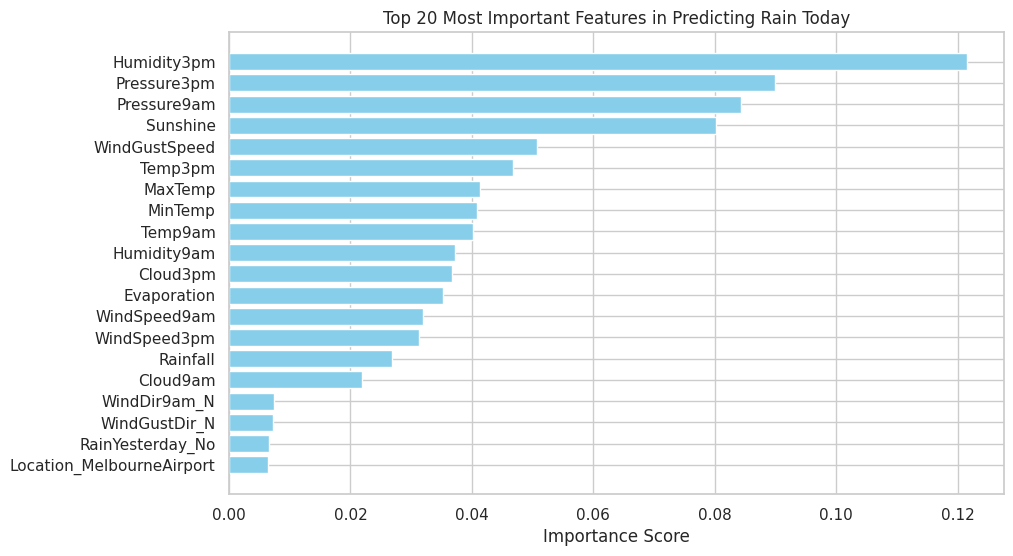

In [28]:
# Extract categorical feature names from the OneHotEncoder inside the preprocessor
ohe = grid_search.best_estimator_['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine numeric and categorical feature names
feature_names = numeric_features + list(cat_feature_names)

# Get feature importances from the trained classifier
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

# Create DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top N features to plot
N = 20
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title(f'Top {N} Most Important Features in Predicting Rain Today')
plt.xlabel('Importance Score')
plt.show()


###Exercise 15. Update the pipeline and the parameter grid¶

Let's update the pipeline and the parameter grid and train a Logistic Regression model and compare the performance of the two models. You'll need to replace the clasifier with LogisticRegression. We have supplied the parameter grid for you.

In [29]:
from sklearn.linear_model import LogisticRegression

# Replace RandomForestClassifier with LogisticRegression in the pipeline
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# Update the grid_search estimator to use the new pipeline
grid_search.estimator = pipeline

# Define new parameter grid for Logistic Regression
param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

# Update grid_search's param_grid
grid_search.param_grid = param_grid

# Fit the updated grid_search on training data
grid_search.fit(X_train, y_train)

# Make predictions on test data
y_pred = grid_search.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


###Compare the results to your previous model.¶

Display the clasification report and the confusion matrix for the new model and compare your results with the previous model.

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.68      0.51      0.58       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



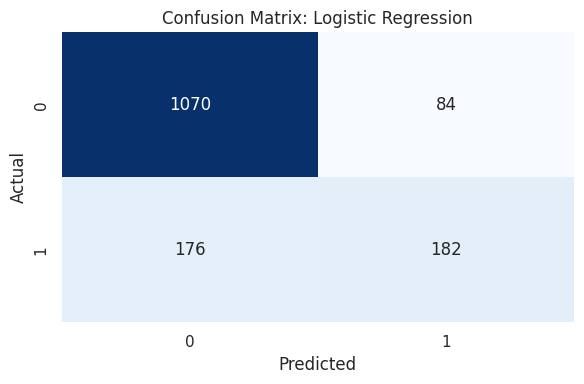

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
